## CROP RECOMMENDATION SYSTEM

In [64]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report

In [65]:
data = pd.read_csv('input/crop_recommendation_dataset.csv')

In [66]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [67]:
data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [68]:
data.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [69]:
data.shape

(2200, 8)

In [70]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [71]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
N              2200 non-null int64
P              2200 non-null int64
K              2200 non-null int64
temperature    2200 non-null float64
humidity       2200 non-null float64
ph             2200 non-null float64
rainfall       2200 non-null float64
label          2200 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [104]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [72]:
data['label'].nunique()

22

In [73]:
labels= data['label'].unique()

In [74]:
labels

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [75]:
data['label'].value_counts()

mothbeans      100
muskmelon      100
blackgram      100
watermelon     100
grapes         100
banana         100
maize          100
coffee         100
mungbean       100
orange         100
kidneybeans    100
coconut        100
rice           100
mango          100
cotton         100
lentil         100
pomegranate    100
jute           100
apple          100
papaya         100
chickpea       100
pigeonpeas     100
Name: label, dtype: int64

In [116]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


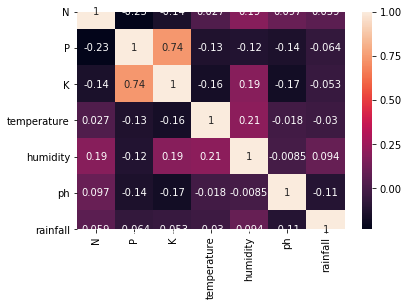

In [76]:
sns.heatmap(data.corr(),annot=True)

### separating features and target

In [117]:
target = data['label']
target

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [118]:
features = data.drop('label',axis=1)
features.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [79]:
#initializing empty lists to append accuracy values and algorithms for comparison

accuracy = []
model = []

###### splitting the data into train and test data

In [80]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size=0.3, random_state = 2)

###### importing cross validator

In [81]:
from sklearn.model_selection import cross_val_score

## Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(Xtrain,Ytrain)



GaussianNB(priors=None, var_smoothing=1e-09)

In [83]:
#testing the training on Naive Bayes


predicted_values_nb = nb.predict(Xtest)
acc = metrics.accuracy_score(Ytest, predicted_values_nb)
print("Naive Bayes Accuracy is: ",acc)
print(classification_report(Ytest,predicted_values_nb))

#append the accuracy score and model name to the empty lists

accuracy.append(acc)
model.append('Naive Bayes')

Naive Bayes Accuracy is:  0.9924242424242424
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.89      0.97      0.93        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00   

In [84]:
#cross validation score (NaiveBayes)

score = cross_val_score(nb,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

## Support vector Machine(SVM)

In [85]:
#importing svm
from sklearn.svm import SVC

svm = SVC(gamma = 'auto')
svm.fit(Xtrain,Ytrain)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [86]:
#testing the SVM model

predicted_values_svm = svm.predict(Xtest)

acc = metrics.accuracy_score(Ytest,predicted_values_svm)
print("SVM's Accuracy is: ", acc)
print(classification_report(Ytest,predicted_values_svm))

#appending accuracy and model name to the list
accuracy.append(acc)
model.append('SVM')


SVM's Accuracy is:  0.07272727272727272
              precision    recall  f1-score   support

       apple       1.00      0.11      0.19        28
      banana       1.00      0.12      0.21        26
   blackgram       1.00      0.07      0.13        28
    chickpea       1.00      0.03      0.07        29
     coconut       0.00      0.00      0.00        31
      coffee       0.00      0.00      0.00        33
      cotton       1.00      0.06      0.12        31
      grapes       0.00      0.00      0.00        29
        jute       0.00      0.00      0.00        33
 kidneybeans       1.00      0.03      0.06        30
      lentil       0.00      0.00      0.00        32
       maize       0.00      0.00      0.00        32
       mango       0.00      0.00      0.00        33
   mothbeans       0.00      0.00      0.00        29
    mungbean       1.00      0.06      0.12        32
   muskmelon       1.00      0.27      0.42        30
      orange       1.00      0.02      0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [87]:
# Cross validation score (SVM)
score = cross_val_score(svm,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

## Logistic Regression

In [88]:
#importing logistic regresssion
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state = 2)
LogReg.fit(Xtrain,Ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
#testing the Logistic Regression model

predicted_values_logreg = LogReg.predict(Xtest)

acc = metrics.accuracy_score(Ytest,predicted_values_logreg)
print("Logistic Regression's accuracy is: ", acc)
print(classification_report(Ytest,predicted_values_logreg))

#appending accuracy and model name to the list
accuracy.append(acc)
model.append('Logistic Regression')

Logistic Regression's accuracy is:  0.946969696969697
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.81      0.93      0.87        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      0.97      0.98        33
      cotton       0.91      1.00      0.95        31
      grapes       1.00      1.00      1.00        29
        jute       0.84      0.79      0.81        33
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.91      0.94      0.92        32
       maize       1.00      0.91      0.95        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.79      0.88        29
    mungbean       0.94      0.94      0.94        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00    

In [90]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

array([0.96818182, 0.93636364, 0.95681818, 0.95681818, 0.94772727])

## Decision Tree

In [91]:
#importing Decision Tree
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion="entropy",random_state=3,max_depth=5)

DT.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=3, splitter='best')

In [92]:
#testing the Decision Tree model

predicted_values_dt = DT.predict(Xtest)

acc = metrics.accuracy_score(Ytest,predicted_values_dt)
print("Decision Tree's accuracy is: ", acc)
print(classification_report(Ytest,predicted_values_dt))

#appending accuracy and model name to the list
accuracy.append(acc)
model.append('Decision Tree')

Decision Tree's accuracy is:  0.8621212121212121
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.64      1.00      0.78        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      0.97      0.98        31
      grapes       1.00      1.00      1.00        29
        jute       0.75      0.09      0.16        33
 kidneybeans       0.00      0.00      0.00        30
      lentil       0.63      1.00      0.77        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       0.00      0.00      0.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [93]:
# Cross validation score (Decision Tree)
score = cross_val_score(dt, features, target,cv=5)
score

array([0.93636364, 0.91136364, 0.91818182, 0.86818182, 0.93636364])

## Random Forest

In [94]:
#importing Random Forest
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=1)
RF.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [95]:
#testing the Random Forest model

predicted_values_rf = RF.predict(Xtest)

acc = metrics.accuracy_score(Ytest,predicted_values_rf)
print("Random Forest accuracy is: ", acc)
print(classification_report(Ytest,predicted_values_rf))

#appending accuracy and model name to the list
accuracy.append(acc)
model.append('Random Forest')

Random Forest accuracy is:  0.9939393939393939
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.97      0.91      0.94        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00 

In [96]:
# Cross validation score (Random Forest)
score = cross_val_score(RF, features, target,cv=5)
score

array([0.99090909, 0.99318182, 0.99545455, 0.99090909, 0.98863636])

In [97]:
accuracy

[0.9924242424242424,
 0.07272727272727272,
 0.946969696969697,
 0.8621212121212121,
 0.9939393939393939]

In [98]:
model

['Naive Bayes', 'SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest']

## KNN 

In [106]:
#importing knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle= True ,random_state=0)
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(Xtrain,Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [107]:
#testing the KNN model

predicted_values_knn = knn.predict(Xtest)

acc = metrics.accuracy_score(Ytest,predicted_values_knn)
print("KNN accuracy is: ", acc)
print(classification_report(Ytest,predicted_values_knn))

#appending accuracy and model name to the list
accuracy.append(acc)
model.append('KNN')

KNN accuracy is:  0.9772727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.93      1.00      0.97        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       0.97      1.00      0.98        31
      grapes       1.00      1.00      1.00        29
        jute       0.88      0.88      0.88        33
 kidneybeans       0.94      1.00      0.97        30
      lentil       0.94      1.00      0.97        32
       maize       1.00      0.94      0.97        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.90      0.95        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00 

In [108]:
# Cross validation score (kNN)
score = cross_val_score(knn, features, target,cv=k_fold,n_jobs=1)
score

array([0.97727273, 0.97272727, 0.97727273, 0.97272727, 0.96363636,
       0.97272727, 0.97272727, 0.98181818, 0.96363636, 0.99545455])

### accuracy comparison

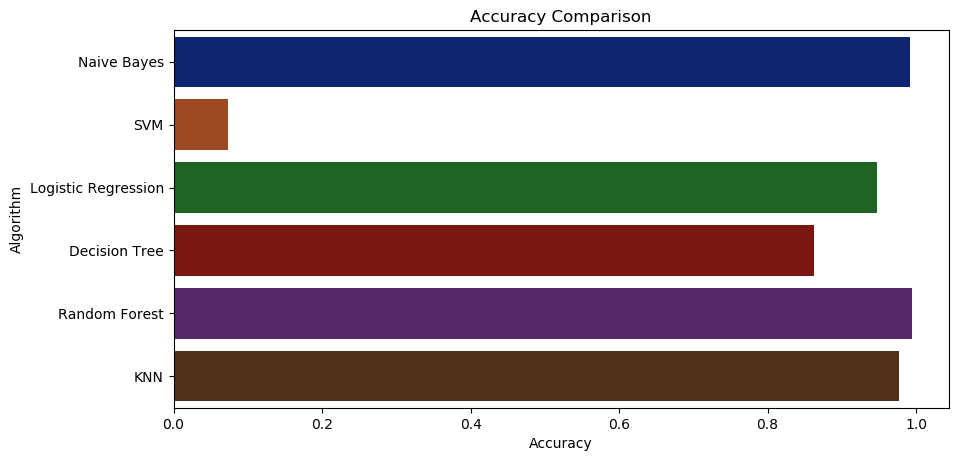

In [109]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy,y = model,palette='dark')

In [110]:
accuracy_models = dict(zip(model, accuracy))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Naive Bayes --> 0.9924242424242424
SVM --> 0.07272727272727272
Logistic Regression --> 0.946969696969697
Decision Tree --> 0.8621212121212121
Random Forest --> 0.9939393939393939
KNN --> 0.9772727272727273


#### Saving Traine Random Forest Model

In [111]:
import pickle

#dumping the trained RF model with pickle
RF_pkl_file = 'RandomForest.pkl'

#Opening the file to save as pkl file
RF_Model_pkl = open(RF_pkl_file, 'wb')
pickle.dump(RF,RF_Model_pkl)

RF_Model_pkl.close()

In [119]:
import json
columns = {
    'data_columns' : [col.lower() for col in features.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

## Making prediction 

In [112]:
random_data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(random_data)
print(prediction)

['coffee']


In [113]:
random_data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(random_data)
print(prediction)

['jute']


In [115]:
random_data = np.array([[38, 45, 60, 98, 70.3, 3.0, 100.9]])
prediction = RF.predict(random_data)
print(prediction)

['mango']
